# Project: Investigate a Dataset - [Covid-19 dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Covid-19 dataset 

>This dataset is about Covid-19 containig information about the confirmed, deaths and recovered cases of countries  till 29 april 2020.

### Questions for Analysis

>What is the number of confirmed Deaths and recoveries in each region?

>In which region the minimum number of deaths was recorded?

>How many confirmed, deaths, recoveries were reported from Egypt till 29 april 2020?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [4]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


## Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes.

###  The Cleaning Process:
>I changed the data type of 'date' colums into a datetime type.

>I checked for null values.

>I checked for duplicates.

In [5]:
#Checking for duplicates..
df.duplicated().sum()

0

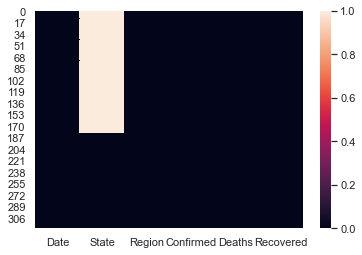

In [6]:
#Checking for null values..
sns.heatmap(df.isnull())
plt.show()

In [34]:
#Improving the columns titles..
df.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace=True)

In [8]:
#Changing the type of the date column into datetime..
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       321 non-null    datetime64[ns]
 1   state      140 non-null    object        
 2   region     321 non-null    object        
 3   confirmed  321 non-null    int64         
 4   deaths     321 non-null    int64         
 5   recovered  321 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.2+ KB


# Q1: Show the number of confirmed, Deaths and recoveries in each region

In [10]:
df.head(2)

,date,state,region,confirmed,deaths,recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455


In [11]:
df['region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 

# Confirmed Cases

In [12]:
highest_20_confirmed = df.groupby('region')['confirmed'].sum().sort_values(ascending = False).head(20)
highest_20_confirmed

region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: confirmed, dtype: int64

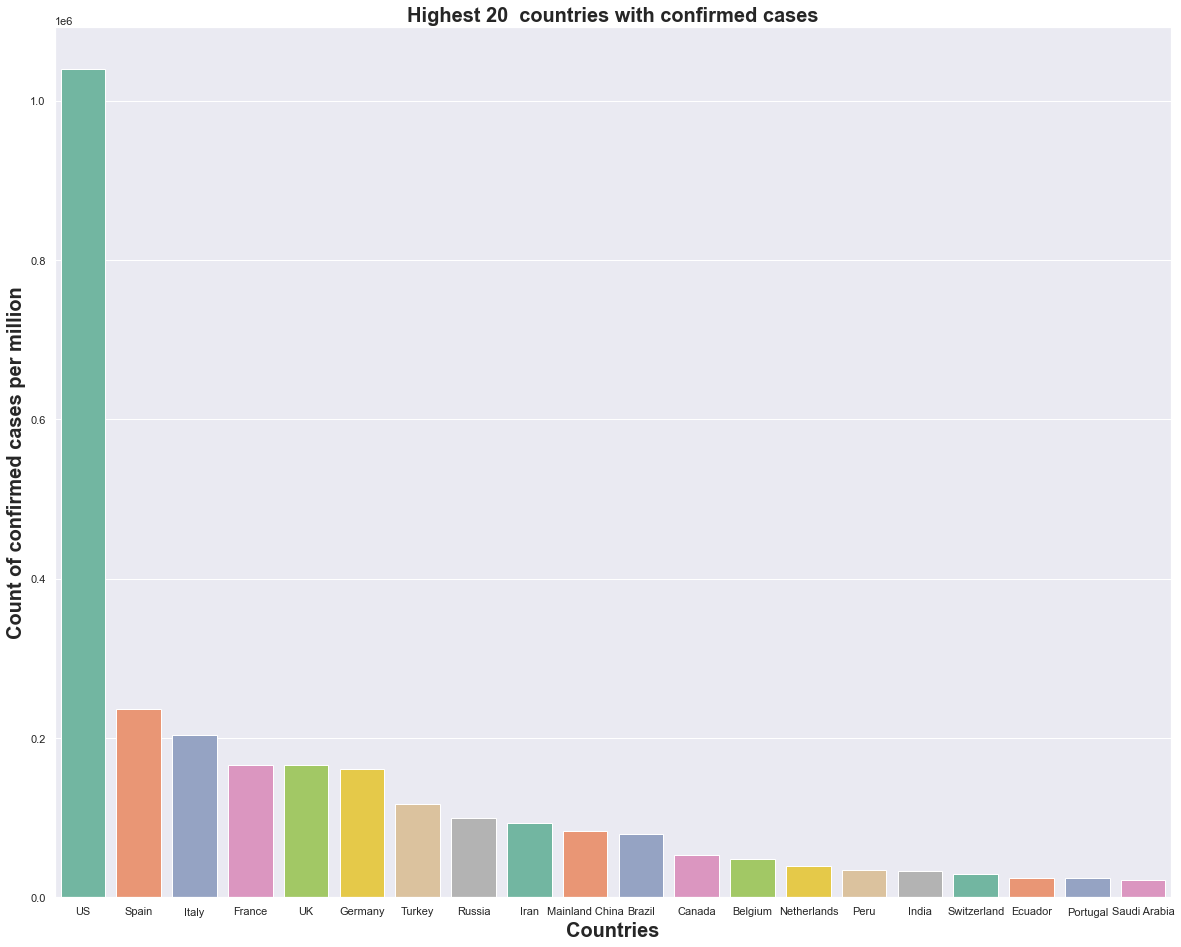

In [13]:
plt.figure(figsize=(20,16))
sns.barplot(x = highest_20_confirmed.index,
            y = highest_20_confirmed,
            palette = 'Set2')
plt.title('Highest 20  countries with confirmed cases', fontsize = 20, weight = 'bold')
plt.xlabel('Countries',  fontsize = 20, weight = 'bold' )
plt.ylabel('Count of confirmed cases per million', fontsize = 20, weight = 'bold' )
plt.show()

> US is by far the highest country with over one million confirmed cases, followed by Spain, Italy and France. 

In [14]:
highest_10_confirmed = df.groupby('region')['confirmed'].sum().sort_values(ascending = False).head(10)
highest_10_confirmed

region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: confirmed, dtype: int64

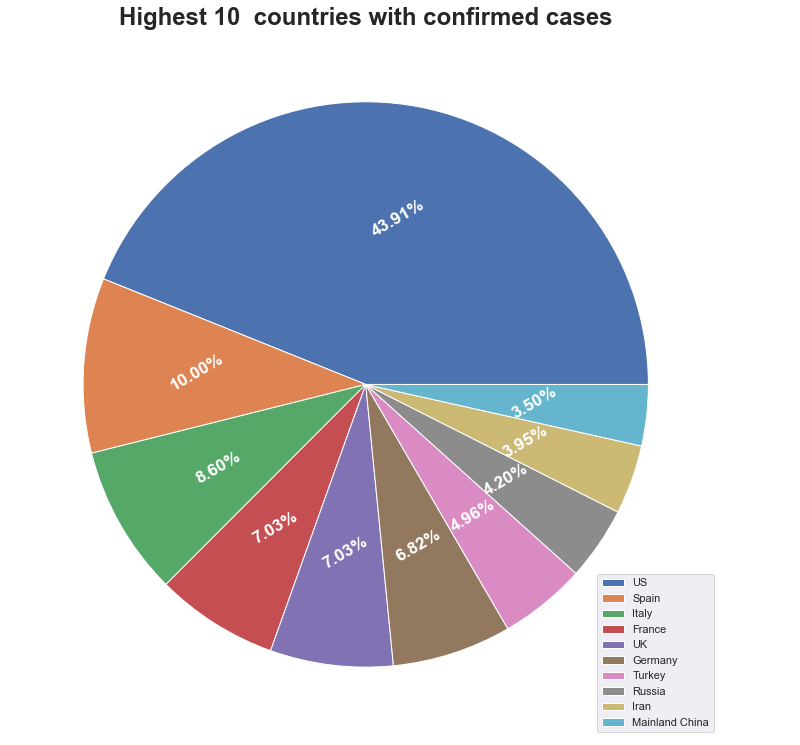

In [15]:
plt.figure(figsize=(13,13))
plt.pie(highest_10_confirmed,
        labels= highest_10_confirmed.index,
        autopct='%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Highest 10  countries with confirmed cases', fontsize= 24, weight = 'bold')
plt.legend()
plt.show()

>Between the highest 10 countries with confirmed cases, US solely have almost 44% of them.

# Deaths Cases

In [16]:
highest_20_deaths = df.groupby('region')['deaths'].sum().sort_values(ascending = False).head(20)
highest_20_deaths

region
US                60967
Italy             27682
UK                26166
Spain             24275
France            24121
Belgium            7501
Germany            6467
Iran               5957
Brazil             5513
Netherlands        4727
Mainland China     4633
Canada             3155
Turkey             3081
Sweden             2462
Mexico             1732
Switzerland        1716
Ireland            1190
India              1079
Portugal            973
Russia              972
Name: deaths, dtype: int64

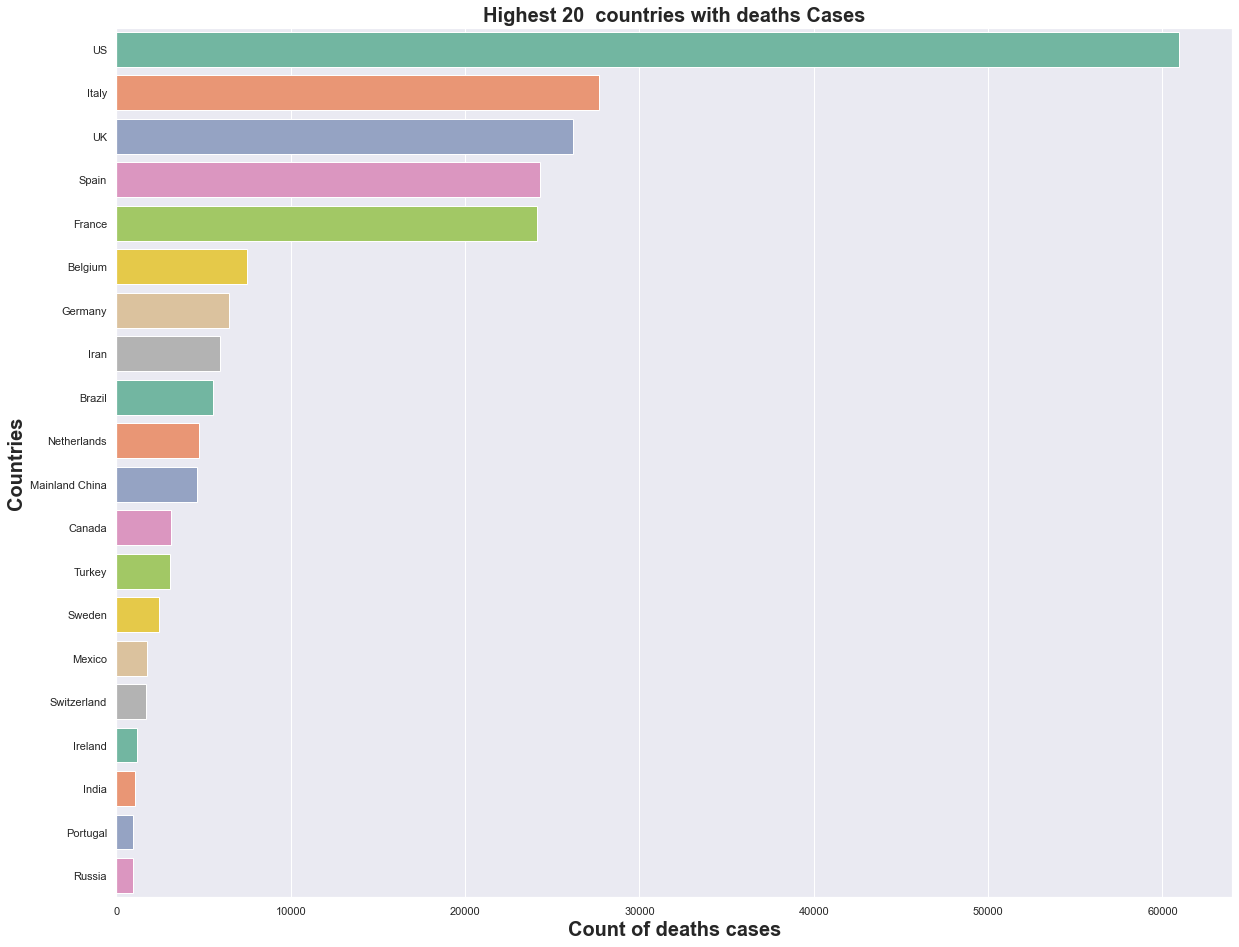

In [35]:
plt.figure(figsize=(20,16))
sns.barplot(x = highest_20_deaths,
            y = highest_20_deaths.index,
            palette = 'Set2')
plt.title('Highest 20  countries with deaths Cases', fontsize = 20, weight = 'bold')
plt.xlabel('Count of deaths cases',  fontsize = 20, weight = 'bold' )
plt.ylabel('Countries', fontsize = 20, weight = 'bold' )
plt.show()

>The US beside Italy, UK, Spain, France are the countries with the highest number of deaths.

>US only have 60967 deaths cases.

In [18]:
highest_10_deaths = df.groupby('region')['deaths'].sum().sort_values(ascending = False).head(10)
highest_10_deaths

region
US             60967
Italy          27682
UK             26166
Spain          24275
France         24121
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Netherlands     4727
Name: deaths, dtype: int64

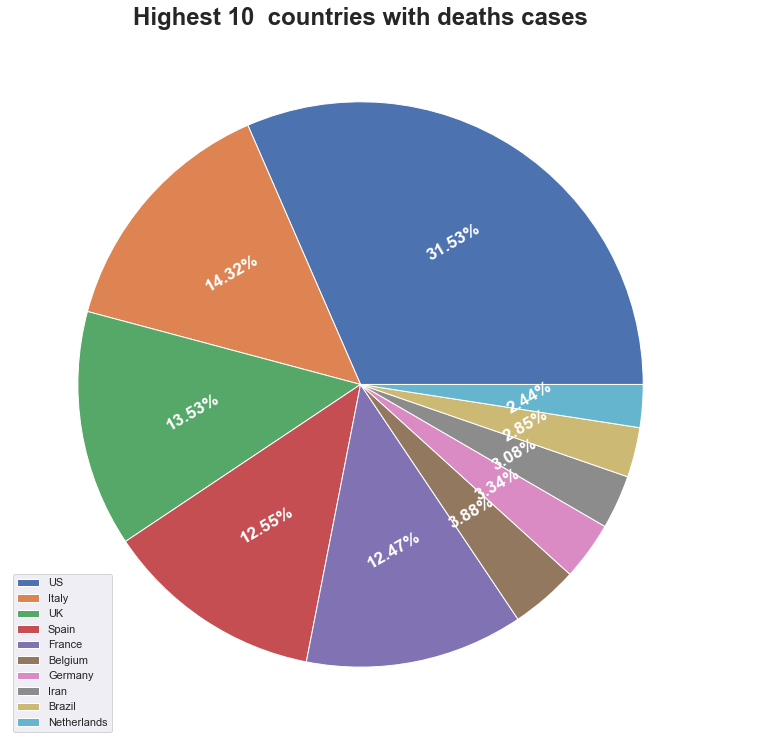

In [19]:
plt.figure(figsize=(13,13))
plt.pie(highest_10_deaths,
        labels= highest_10_deaths.index,
        autopct='%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Highest 10  countries with deaths cases', fontsize= 24, weight = 'bold')
plt.legend()
plt.show()

>The US and Italy share alomost 50% of deaths cases between the highest 10 countries.

# Recovered Cases

In [20]:
highest_20_recovered = df.groupby('region')['recovered'].sum().sort_values(ascending = False).head(20)
highest_20_recovered

region
Spain             132929
US                120720
Germany           120400
Mainland China     77610
Iran               73791
Italy              71252
France             49118
Turkey             44040
Brazil             34132
Switzerland        22600
Canada             20327
Ireland            13386
Austria            12779
Mexico             11423
Belgium            11283
Russia             10286
Peru               10037
South Korea         9059
India               8437
Israel              8233
Name: recovered, dtype: int64

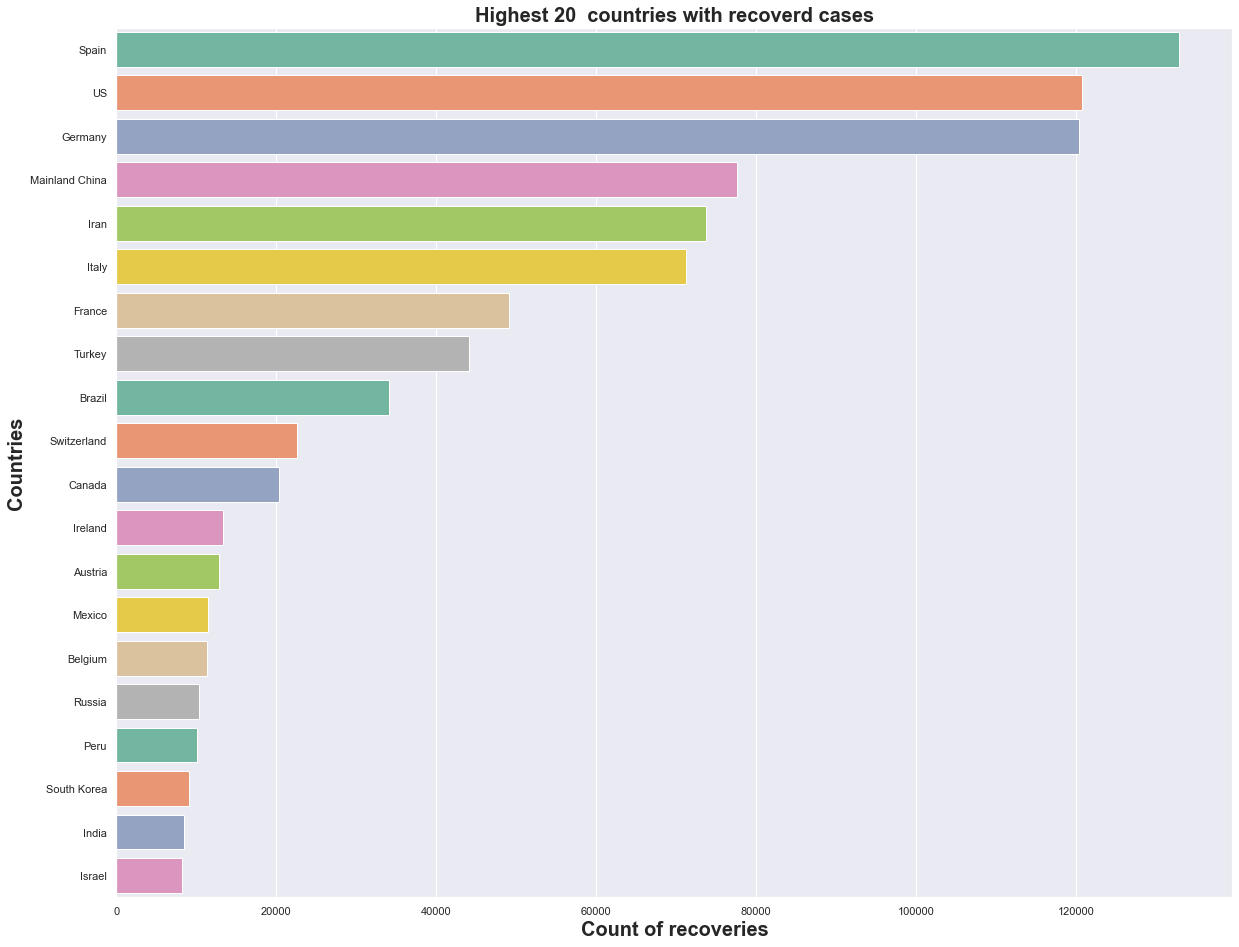

In [36]:
plt.figure(figsize=(20,16))
sns.barplot(x = highest_20_recovered,
            y = highest_20_recovered.index,
            palette = 'Set2')
plt.title('Highest 20  countries with recoverd cases', fontsize = 20, weight = 'bold')
plt.xlabel('Count of recoveries',  fontsize = 20, weight = 'bold' )
plt.ylabel('Countries', fontsize = 20, weight = 'bold' )
plt.show()

>Spain recorded only 236899 confirmed cases, yet managed to have a world highest 132929 recoverd cases, leaving the US in the second place with only 120720 recovered cases.

>Spain, US and Germany are the countries with the highest number of recoveries.

In [22]:
highest_10_recovered = df.groupby('region')['recovered'].sum().sort_values(ascending = False).head(10)
highest_10_recovered

region
Spain             132929
US                120720
Germany           120400
Mainland China     77610
Iran               73791
Italy              71252
France             49118
Turkey             44040
Brazil             34132
Switzerland        22600
Name: recovered, dtype: int64

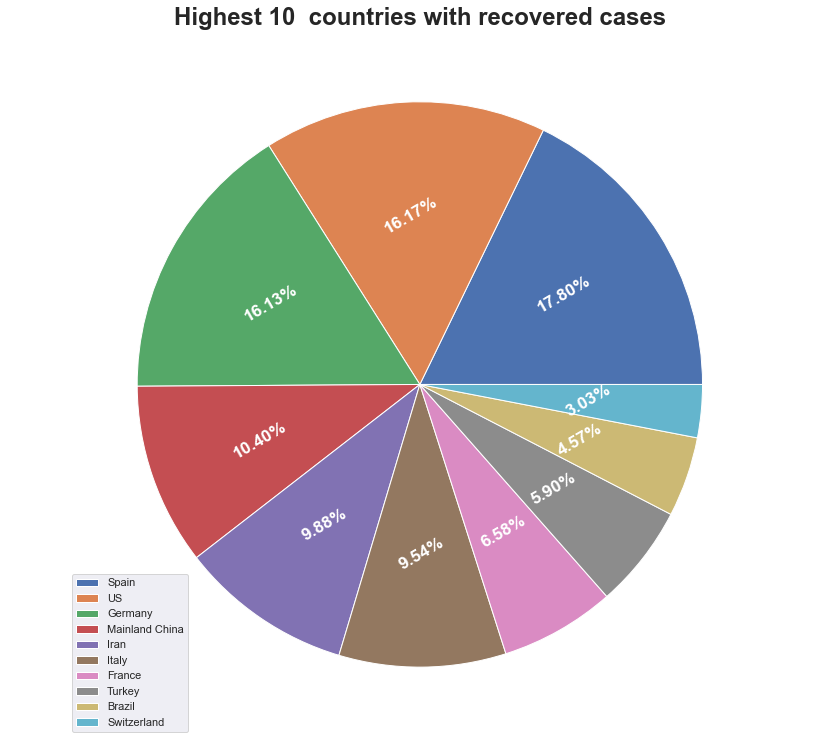

In [23]:
plt.figure(figsize=(13,13))
plt.pie(highest_10_recovered,
        labels= highest_10_recovered.index,
        autopct= '%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Highest 10  countries with recovered cases', fontsize= 24, weight = 'bold')
plt.legend()
plt.show()


>Spain, US and Germany share exactly 50% of recovered cases between the highest 10 countries of recovered cases.

# Summarization of the data

In [24]:
tot = df.groupby('region').sum().sort_values(by = 'confirmed', ascending=False).head(30)
tot

,confirmed,deaths,recovered
region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
Germany,161539,6467,120400
Turkey,117589,3081,44040
Russia,99399,972,10286
Iran,93657,5957,73791


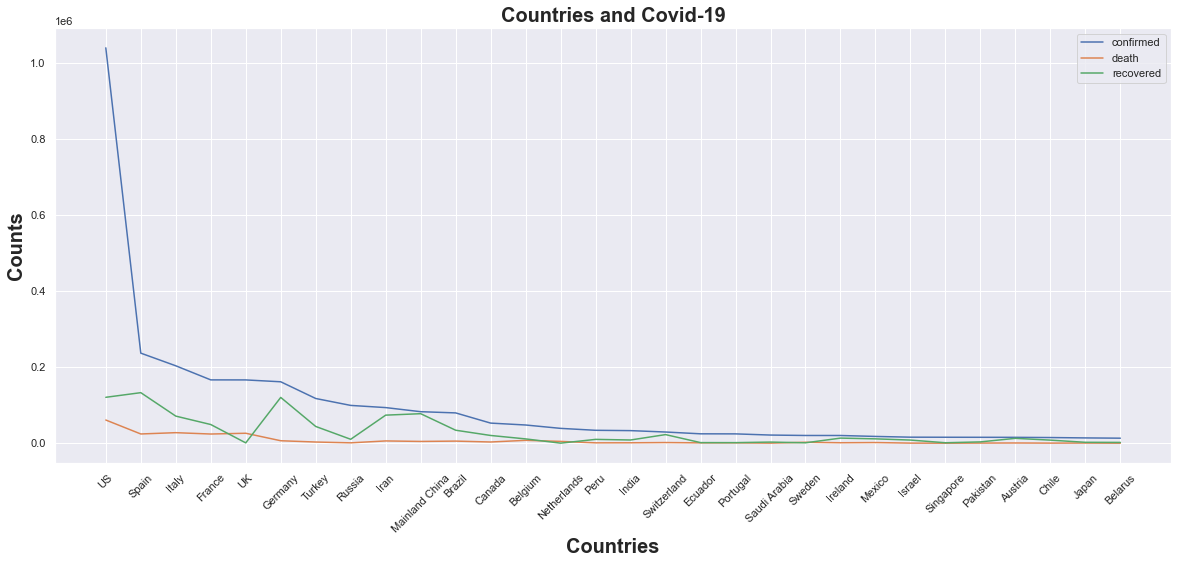

In [25]:
labels = ['confirmed', 'death', 'recovered' ]
plt.figure(figsize=(20,8))
plt.plot(tot)        
plt.title('Countries and Covid-19', fontsize = 20, fontweight = 'bold')
plt.ylabel('Counts', fontsize = 20, fontweight = 'bold')
plt.xlabel('Countries', fontsize = 20, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.legend(labels = labels)
plt.show()

# Q2: Remove all data where confirmed is less than 10 

In [26]:
df.head(2)

,date,state,region,confirmed,deaths,recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455


In [27]:
confirmed_less_10 = df[df['confirmed'] < 10]
confirmed_less_10

,date,state,region,confirmed,deaths,recovered
18,2020-04-29,NaN,Bhutan,7,0,5
98,2020-04-29,NaN,MS Zaandam,9,2,0
105,2020-04-29,NaN,Mauritania,8,1,6
126,2020-04-29,NaN,Papua New Guinea,8,0,0
140,2020-04-29,NaN,Sao Tome and Principe,8,0,4
177,2020-04-29,NaN,Western Sahara,6,0,5
178,2020-04-29,NaN,Yemen,6,0,1
184,2020-04-29,Anguilla,UK,3,0,3
192,2020-04-29,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,2020-04-29,British Virgin Islands,UK,6,1,3


In [28]:
len(confirmed_less_10)

17

> Only 17 times where records were less than 10 confirmed cases in the dataset.

In [29]:
df.drop(confirmed_less_10.index, inplace=True)

In [30]:
#Checking...
df[df['confirmed'] < 10]

,date,state,region,confirmed,deaths,recovered


# Q3: In which region the minimum number of deaths was recorded

In [31]:
df.head(1)

,date,state,region,confirmed,deaths,recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252


In [32]:
df.groupby('region')['deaths'].sum().sort_values().head(30)

region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

>Cambodia, Seychelles, Saint Lucia, Central African Republic, Saint Kitts and Nevis, South Sudan      Rwanda, Grenada, Macau, Madagascar, Nepal, Namibia, Saint Vincent and the Grenadines, Mozambique, Holy See, Timor-Leste, Mongolia, Uganda, Laos, Eritrea, Vietnam, Fiji and Dominica all managed to record Zero deaths cases

# Q4: How many confirmed, deaths, recoveries were reported from india till 29 april 2020?

In [33]:
df[(df['region'] == 'India') & (df['date'] <= '2020-4-29' )]

,date,state,region,confirmed,deaths,recovered
74,2020-04-29,NaN,India,33062,1079,8437


>India recorded 33062 confirmed cases, 1079 deaths cases, 8437 recovered cases.

<a id='conclusions'></a>
# Conclusions:

> US is by far the highest country with over one million confirmed cases, followed by Spain, Italy and France.

>Between the highest 10 countries with confirmed cases, US solely have almost 44% of them.

>The US beside Italy, UK, Spain, France are the countries with the highest number of deaths.

>US only recorded 60967 deaths cases.

>The US and Italy share alomost 50% of deaths cases between the highest 10 countries.

>Spain recorded only 236899 confirmed cases, yet managed to have a world highest 132929 recoverd cases, leaving the US in the second place with only 120720 recovered cases.

>Spain, US and Germany are the countries with the highest number of recoveries.

>Spain, US and Germany share exactly 50% of recovered cases between the highest 10 countries

>Cambodia, Seychelles, Saint Lucia, Central African Republic, Saint Kitts and Nevis, South Sudan      Rwanda, Grenada, Macau, Madagascar, Nepal, Namibia, Saint Vincent and the Grenadines, Mozambique, Holy See, Timor-Leste, Mongolia, Uganda, Laos, Eritrea, Vietnam, Fiji and Dominica all managed to record Zero deaths cases.

>Egypt recorded 5268 confirmed cases, 380 deaths cases, 1335 recovered cases.